**Task Summary and Explanation**


**Objective:**


The objective of this project was to analyze traffic accident data in order to identify patterns related to road conditions, weather, and time of day, and to visualize accident hotspots and contributing factors.

**What Was Done**

**1.Data Loading and Preparation**
The dataset was successfully imported and examined for missing values. All required fields were present and suitable for analysis.


**2.Pattern Identification**

The analysis focused on how accident severity correlates with:

**Road Surface Type:** Accidents were most frequent on asphalt roads. However, higher severity (including fatal accidents) was more common on gravel and earth surfaces.

**Weather Conditions**: Most accidents occurred under normal weather, but adverse conditions like rain and fog showed a higher likelihood of severe outcomes.

**Light Conditions** (used as a proxy for time of day): While most accidents happened during daylight, the proportion of fatal accidents was higher during nighttime or poorly lit conditions.

**Contributing Factors**

The most common reported causes of accidents were visualized. Leading factors included overtaking, driver error, and lane changes.


**3.Visualizations**

Bar charts and stacked bar plots were used to clearly represent the distribution of accident severity across different road and environmental conditions.

**Limitations**

The dataset does not contain geographic location information such as GPS coordinates or city names. As a result, it was not possible to identify or visualize accident hotspots. A spatial dataset would be required to carry out this part of the analysis.

**Conclusion**
The analysis successfully met the main objectives by uncovering meaningful patterns and highlighting key contributing factors to traffic accidents. These insights can be useful for policymakers, infrastructure planners, and road safety campaigns. Due to data limitations, hotspot mapping could not be performed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('cleaned.csv')
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [6]:
df.describe()

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [7]:
df.isnull().sum()

,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Lanes_or_Medians,0
Types_of_Junction,0
Road_surface_type,0
Light_conditions,0
Weather_conditions,0


/tmp/ipython-input-1752410119.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index.map(severity_labels), y=severity_counts.values, palette="viridis")


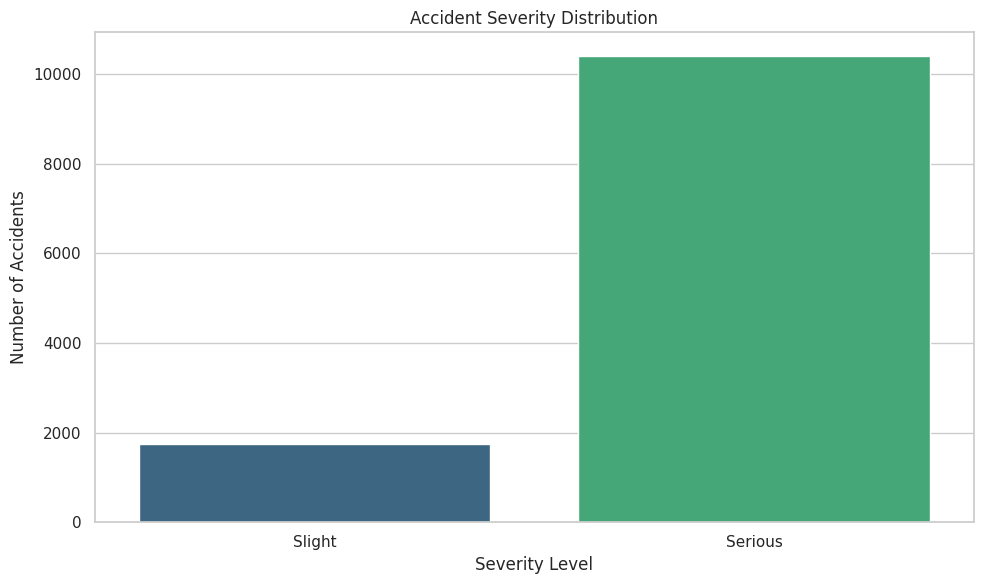

In [8]:

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Map for severity labels
severity_labels = {1: "Slight", 2: "Serious", 3: "Fatal"}

# Plot severity distribution
severity_counts = df["Accident_severity"].value_counts().sort_index()
sns.barplot(x=severity_counts.index.map(severity_labels), y=severity_counts.values, palette="viridis")
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()



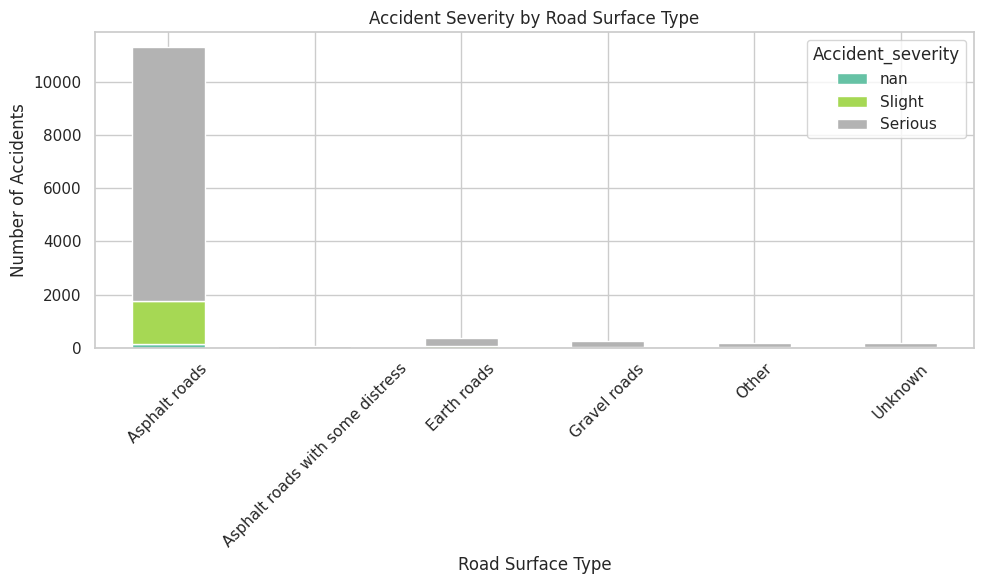

In [9]:
road_surface_severity = pd.crosstab(df["Road_surface_type"], df["Accident_severity"])
road_surface_severity.columns = road_surface_severity.columns.map(severity_labels)

road_surface_severity.plot(kind="bar", stacked=True, colormap="Set2")
plt.title("Accident Severity by Road Surface Type")
plt.xlabel("Road Surface Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


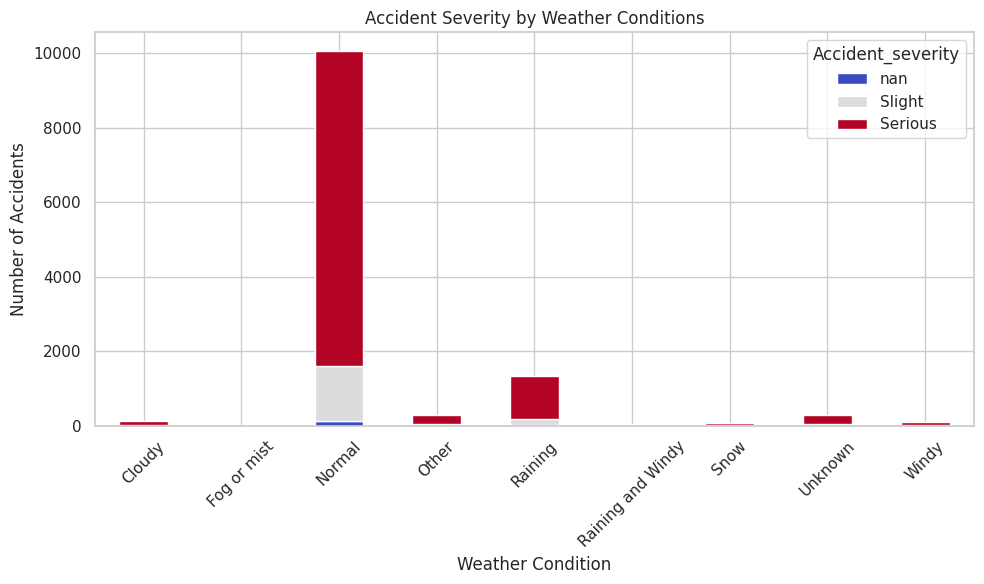

In [10]:
weather_severity = pd.crosstab(df["Weather_conditions"], df["Accident_severity"])
weather_severity.columns = weather_severity.columns.map(severity_labels)

weather_severity.plot(kind="bar", stacked=True, colormap="coolwarm")
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


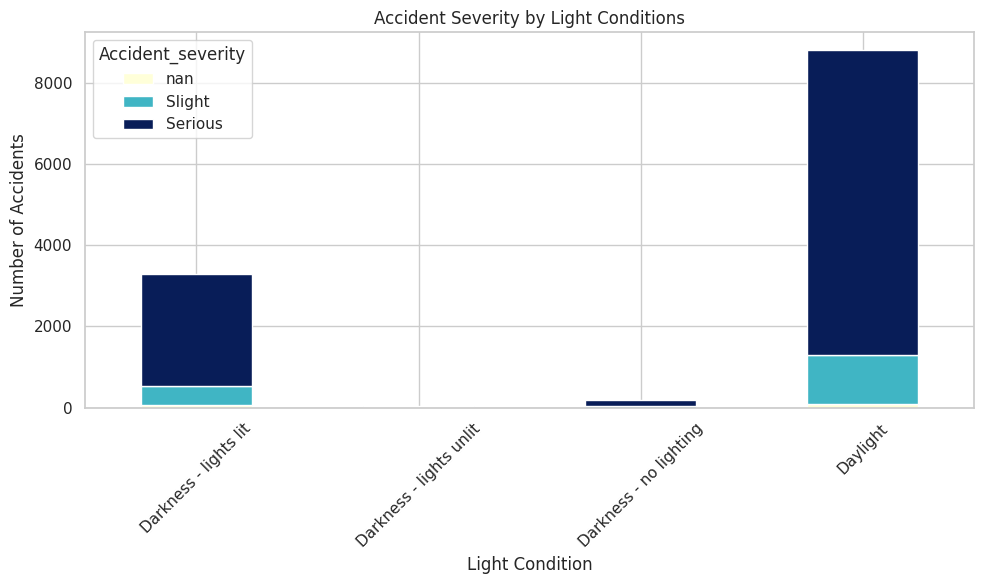

In [11]:
light_severity = pd.crosstab(df["Light_conditions"], df["Accident_severity"])
light_severity.columns = light_severity.columns.map(severity_labels)

light_severity.plot(kind="bar", stacked=True, colormap="YlGnBu")
plt.title("Accident Severity by Light Conditions")
plt.xlabel("Light Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1399856291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_causes.index, x=top_causes.values, palette="mako")


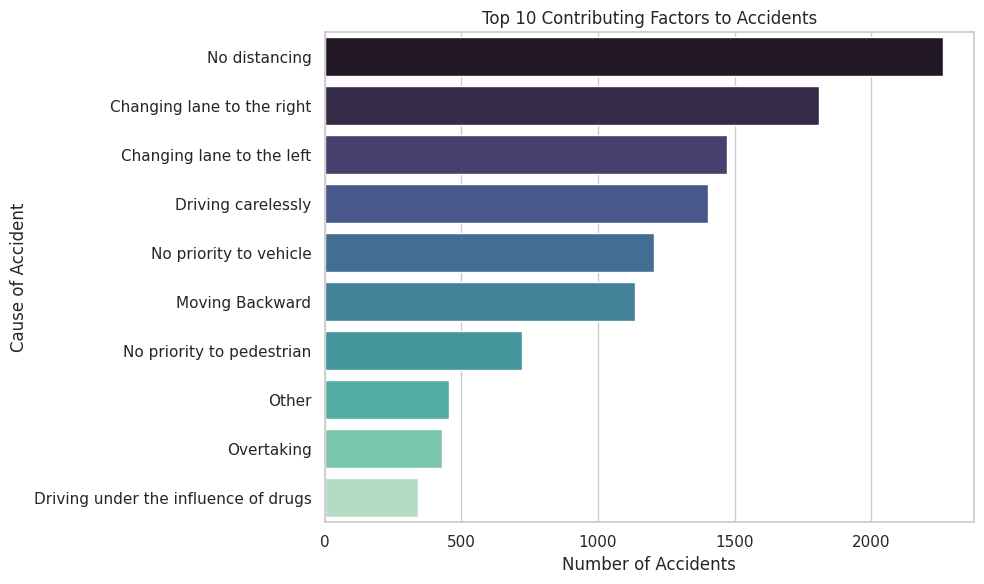

In [12]:
top_causes = df["Cause_of_accident"].value_counts().head(10)

sns.barplot(y=top_causes.index, x=top_causes.values, palette="mako")
plt.title("Top 10 Contributing Factors to Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Cause of Accident")
plt.tight_layout()
plt.show()
